**Analysis and Prediction  of  Crime in Indore City .**
The data of Indore City crime is publicly available.
https://www.indorepolice.org/index.php

1) We scrap the Indore Police Records using Beautiful Soup 
https://www.geeksforgeeks.org/downloading-files-web-using-python/

In [0]:
!pip install beautifulsoup4

2) We create data.csv file from all the raw data scraped from website https://github.com/vikram-bhati/PAASBAAN-crime-prediction

**Data Processssing Should be done here**
tilll then we procced with visualisaation andd model training of already processed data 

Preprocessing Steps 

1.   Convert the xlsl file to csv and pandas dataframes
2.   Use google translate packages to translate name of police station to English.
3.   Convert the police station name to adress and find its lattitude and longitude 
4.  Split the values in IPC Act column and Label Encode 
5.  Split the date and time from time stamp 




In [0]:
import requests
from bs4 import BeautifulSoup
import urllib3


http = urllib3.PoolManager()
url = "https://www.indorepolice.org/"

def get_links():

    r = requests.get(url)
    response = http.request('GET', url)
    soup = BeautifulSoup(response.data)
    links = soup.find_all("a")

    file_links = [url + link['href'] for link in links if link['href'].endswith("xlsx")]
    return file_links

def download_links(file_links):

    for link in file_links:
        f_name = link.split("/")[-1]

        print ("Downloading file:"+f_name)
          
        # create response object 
        r = requests.get(link, stream = True) 
          
        # download started 
        with open(f_name, 'wb') as f: 
            for chunk in r.iter_content(chunk_size = 1024*1024): 
                if chunk: 
                    f.write(chunk) 
          
        print (f_name+" downloaded!") 
  
    print ("All videos downloaded!")
    return
  
  
if __name__ == "__main__": 
  
    # getting all video links 
    file_links = get_links() 
  
    # download all videos 
    download_links(file_links) 

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2019-01-02-IND DSR 02.01.2019.xlsx downloaded!
2019-01-02-IND DSR 02.01.2019.xlsx downloaded!
2019-01-01-IND DSR 01.01.2019.xlsx downloaded!
All videos downloaded!


In [0]:
import pandas as pd

In [0]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1QJxRGGMgx6JJ0oyYyxpJlxymCWWIxszP'

In [0]:
downloaded = drive.CreateFile({'id':'1QJxRGGMgx6JJ0oyYyxpJlxymCWWIxszP'}) 
downloaded.GetContentFile('Filename.csv')  
data = pd.read_csv('Filename.csv')

In [0]:
data_shape = data.shape

In [0]:
print(data_shape)
data.head(10)

(2090, 9)


,timestamp,act379,act13,act279,act323,act363,act302,latitude,longitude
0,28-02-2018 21:00,1,0,0,0,0,0,22.737260,75.875987
1,28-02-2018 21:15,1,0,0,0,0,0,22.720992,75.876083
2,28-02-2018 10:15,0,0,1,0,0,0,22.736676,75.883168
3,28-02-2018 10:15,0,0,1,0,0,0,22.746527,75.887139
4,28-02-2018 10:30,0,0,1,0,0,0,22.769531,75.888772
5,28-02-2018 14:15,0,0,0,1,0,0,22.735218,75.913366
6,28-02-2018 08:00,0,0,0,0,1,0,22.736766,75.908579
7,28-02-2018 03:30,0,0,0,1,0,0,22.736766,75.908579
8,28-02-2018 01:30,1,0,0,0,0,0,22.722247,75.915294
9,28-02-2018 19:00,0,0,0,1,0,0,22.722247,75.915294


In [0]:
label_names = ['act379','act13','act279','act323','act363','act302']
dummies = data[label_names]
dummies

,act379,act13,act279,act323,act363,act302
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0
5,0,0,0,1,0,0
6,0,0,0,0,1,0
7,0,0,0,1,0,0
8,1,0,0,0,0,0
9,0,0,0,1,0,0


In [0]:
import numpy as np 
data["all_acts"] = pd.Series(dummies.columns[np.where(dummies==1)[1]])



In [0]:
#s3 = dummies.idxmax(axis=1)
#s3

In [0]:
data.head(10)

,timestamp,act379,act13,act279,act323,act363,act302,latitude,longitude,all_acts
0,28-02-2018 21:00,1,0,0,0,0,0,22.737260,75.875987,act379
1,28-02-2018 21:15,1,0,0,0,0,0,22.720992,75.876083,act379
2,28-02-2018 10:15,0,0,1,0,0,0,22.736676,75.883168,act279
3,28-02-2018 10:15,0,0,1,0,0,0,22.746527,75.887139,act279
4,28-02-2018 10:30,0,0,1,0,0,0,22.769531,75.888772,act279
5,28-02-2018 14:15,0,0,0,1,0,0,22.735218,75.913366,act323
6,28-02-2018 08:00,0,0,0,0,1,0,22.736766,75.908579,act363
7,28-02-2018 03:30,0,0,0,1,0,0,22.736766,75.908579,act323
8,28-02-2018 01:30,1,0,0,0,0,0,22.722247,75.915294,act379
9,28-02-2018 19:00,0,0,0,1,0,0,22.722247,75.915294,act323


In [0]:
count = data["all_acts"].value_counts()
pd.DataFrame({'acts':count.index, 'total':count.values})

,acts,total
0,act323,792
1,act279,682
2,act379,396
3,act363,110
4,act13,88
5,act302,22


In [0]:
type(count)


pandas.core.series.Series

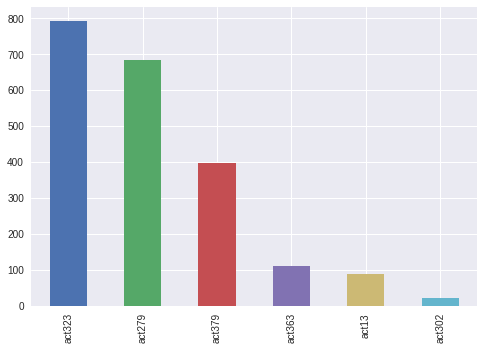

In [0]:
ax = count.plot(kind="bar")

In [0]:
for col in data:
    print (type(data[col][1]))

<class 'str'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'str'>


In [0]:

data['timestamp'] = pd.to_datetime(data['timestamp'],errors='coerce')
data['time'] = data["timestamp"].dt.hour
data.head()

,timestamp,act379,act13,act279,act323,act363,act302,latitude,longitude,all_acts,time
0,2018-02-28 21:00:00,1,0,0,0,0,0,22.737260,75.875987,act379,21.0
1,2018-02-28 21:15:00,1,0,0,0,0,0,22.720992,75.876083,act379,21.0
2,2018-02-28 10:15:00,0,0,1,0,0,0,22.736676,75.883168,act279,10.0
3,2018-02-28 10:15:00,0,0,1,0,0,0,22.746527,75.887139,act279,10.0
4,2018-02-28 10:30:00,0,0,1,0,0,0,22.769531,75.888772,act279,10.0


In [0]:
data.head(10)

,timestamp,act379,act13,act279,act323,act363,act302,latitude,longitude,all_acts,time
0,2018-02-28 21:00:00,1,0,0,0,0,0,22.737260,75.875987,act379,21.0
1,2018-02-28 21:15:00,1,0,0,0,0,0,22.720992,75.876083,act379,21.0
2,2018-02-28 10:15:00,0,0,1,0,0,0,22.736676,75.883168,act279,10.0
3,2018-02-28 10:15:00,0,0,1,0,0,0,22.746527,75.887139,act279,10.0
4,2018-02-28 10:30:00,0,0,1,0,0,0,22.769531,75.888772,act279,10.0
5,2018-02-28 14:15:00,0,0,0,1,0,0,22.735218,75.913366,act323,14.0
6,2018-02-28 08:00:00,0,0,0,0,1,0,22.736766,75.908579,act363,8.0
7,2018-02-28 03:30:00,0,0,0,1,0,0,22.736766,75.908579,act323,3.0
8,2018-02-28 01:30:00,1,0,0,0,0,0,22.722247,75.915294,act379,1.0
9,2018-02-28 19:00:00,0,0,0,1,0,0,22.722247,75.915294,act323,19.0


In [0]:
db2 = data["all_acts"]

In [0]:
column_1 = data["timestamp"]

db=pd.DataFrame({"year": column_1.dt.year,
              "month": column_1.dt.month,
              "day": column_1.dt.day,
              "hour": column_1.dt.hour,
              "dayofyear": column_1.dt.dayofyear,
              "week": column_1.dt.week,
              "weekofyear": column_1.dt.weekofyear,
              "dayofweek": column_1.dt.dayofweek,
              "weekday": column_1.dt.weekday,
              "quarter": column_1.dt.quarter,
             })

In [0]:
db.head()

,day,dayofweek,dayofyear,hour,month,quarter,week,weekday,weekofyear,year
0,28.0,2.0,59.0,21.0,2.0,1.0,9.0,2.0,9.0,2018.0
1,28.0,2.0,59.0,21.0,2.0,1.0,9.0,2.0,9.0,2018.0
2,28.0,2.0,59.0,10.0,2.0,1.0,9.0,2.0,9.0,2018.0
3,28.0,2.0,59.0,10.0,2.0,1.0,9.0,2.0,9.0,2018.0
4,28.0,2.0,59.0,10.0,2.0,1.0,9.0,2.0,9.0,2018.0


In [0]:
dataset1=data.drop('timestamp',axis=1)

In [0]:
data1=pd.concat([db,dataset1],axis=1)

In [0]:
#data1=pd.concat([db2,data1],axis=1)

In [0]:
data1.head()

,day,dayofweek,dayofyear,hour,month,quarter,week,weekday,weekofyear,year,act379,act13,act279,act323,act363,act302,latitude,longitude,all_acts,time
0,28.0,2.0,59.0,21.0,2.0,1.0,9.0,2.0,9.0,2018.0,1,0,0,0,0,0,22.737260,75.875987,act379,21.0
1,28.0,2.0,59.0,21.0,2.0,1.0,9.0,2.0,9.0,2018.0,1,0,0,0,0,0,22.720992,75.876083,act379,21.0
2,28.0,2.0,59.0,10.0,2.0,1.0,9.0,2.0,9.0,2018.0,0,0,1,0,0,0,22.736676,75.883168,act279,10.0
3,28.0,2.0,59.0,10.0,2.0,1.0,9.0,2.0,9.0,2018.0,0,0,1,0,0,0,22.746527,75.887139,act279,10.0
4,28.0,2.0,59.0,10.0,2.0,1.0,9.0,2.0,9.0,2018.0,0,0,1,0,0,0,22.769531,75.888772,act279,10.0


#Data Analysis

In [0]:
data1.describe()

,day,dayofweek,dayofyear,hour,month,quarter,week,weekday,weekofyear,year,act379,act13,act279,act323,act363,act302,latitude,longitude,time
count,2068.000000,2068.000000,2068.000000,2068.000000,2068.000000,2068.000000,2068.000000,2068.000000,2068.000000,2068.0,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2068.000000
mean,9.505319,2.601064,87.079787,15.398936,3.574468,1.585106,12.925532,2.601064,12.925532,2018.0,0.189474,0.042105,0.326316,0.378947,0.052632,0.010526,22.716464,75.855261,15.398936
std,10.984506,1.535561,56.924847,5.826465,2.029479,0.720836,8.131554,1.535561,8.131554,0.0,0.391978,0.200877,0.468977,0.485241,0.223350,0.102081,0.050563,0.059993,5.826465
min,1.000000,1.000000,3.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.531931,75.542195,0.000000
25%,3.000000,2.000000,59.000000,13.000000,2.000000,1.000000,9.000000,2.000000,9.000000,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.700700,75.836600,13.000000
50%,3.000000,2.000000,62.000000,16.000000,3.000000,1.000000,9.000000,2.000000,9.000000,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.720000,75.860581,16.000000
75%,28.000000,3.000000,123.000000,20.000000,5.000000,2.000000,18.000000,3.000000,18.000000,2018.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,22.738098,75.885012,20.000000
max,28.000000,6.000000,184.000000,23.000000,7.000000,3.000000,27.000000,6.000000,27.000000,2018.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,22.929638,76.032055,23.000000


In [0]:
data1.shape

(2090, 20)

We have 2090 rows of data but with null values , so when we dropped we get 2068 rows for all

In [0]:
data1.dropna(inplace=True)
data1.describe()

,day,dayofweek,dayofyear,hour,month,quarter,week,weekday,weekofyear,year,act379,act13,act279,act323,act363,act302,latitude,longitude,time
count,2068.000000,2068.000000,2068.000000,2068.000000,2068.000000,2068.000000,2068.000000,2068.000000,2068.000000,2068.0,2068.000000,2068.000000,2068.000000,2068.000000,2068.000000,2068.000000,2068.000000,2068.000000,2068.000000
mean,9.505319,2.601064,87.079787,15.398936,3.574468,1.585106,12.925532,2.601064,12.925532,2018.0,0.191489,0.042553,0.329787,0.372340,0.053191,0.010638,22.715794,75.855268,15.398936
std,10.984506,1.535561,56.924847,5.826465,2.029479,0.720836,8.131554,1.535561,8.131554,0.0,0.393568,0.201896,0.470249,0.483545,0.224469,0.102617,0.050290,0.060308,5.826465
min,1.000000,1.000000,3.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.531931,75.542195,0.000000
25%,3.000000,2.000000,59.000000,13.000000,2.000000,1.000000,9.000000,2.000000,9.000000,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.700445,75.835712,13.000000
50%,3.000000,2.000000,62.000000,16.000000,3.000000,1.000000,9.000000,2.000000,9.000000,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.719980,75.860731,16.000000
75%,28.000000,3.000000,123.000000,20.000000,5.000000,2.000000,18.000000,3.000000,18.000000,2018.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,22.737452,75.885234,20.000000
max,28.000000,6.000000,184.000000,23.000000,7.000000,3.000000,27.000000,6.000000,27.000000,2018.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,22.929638,76.032055,23.000000


#Data Visualisation and Analysis

In [0]:
#Pair plot gives the graph for grids where columns and rows are the features , it checks the occuring of one feature when other feature exists

In [0]:
import seaborn as sns

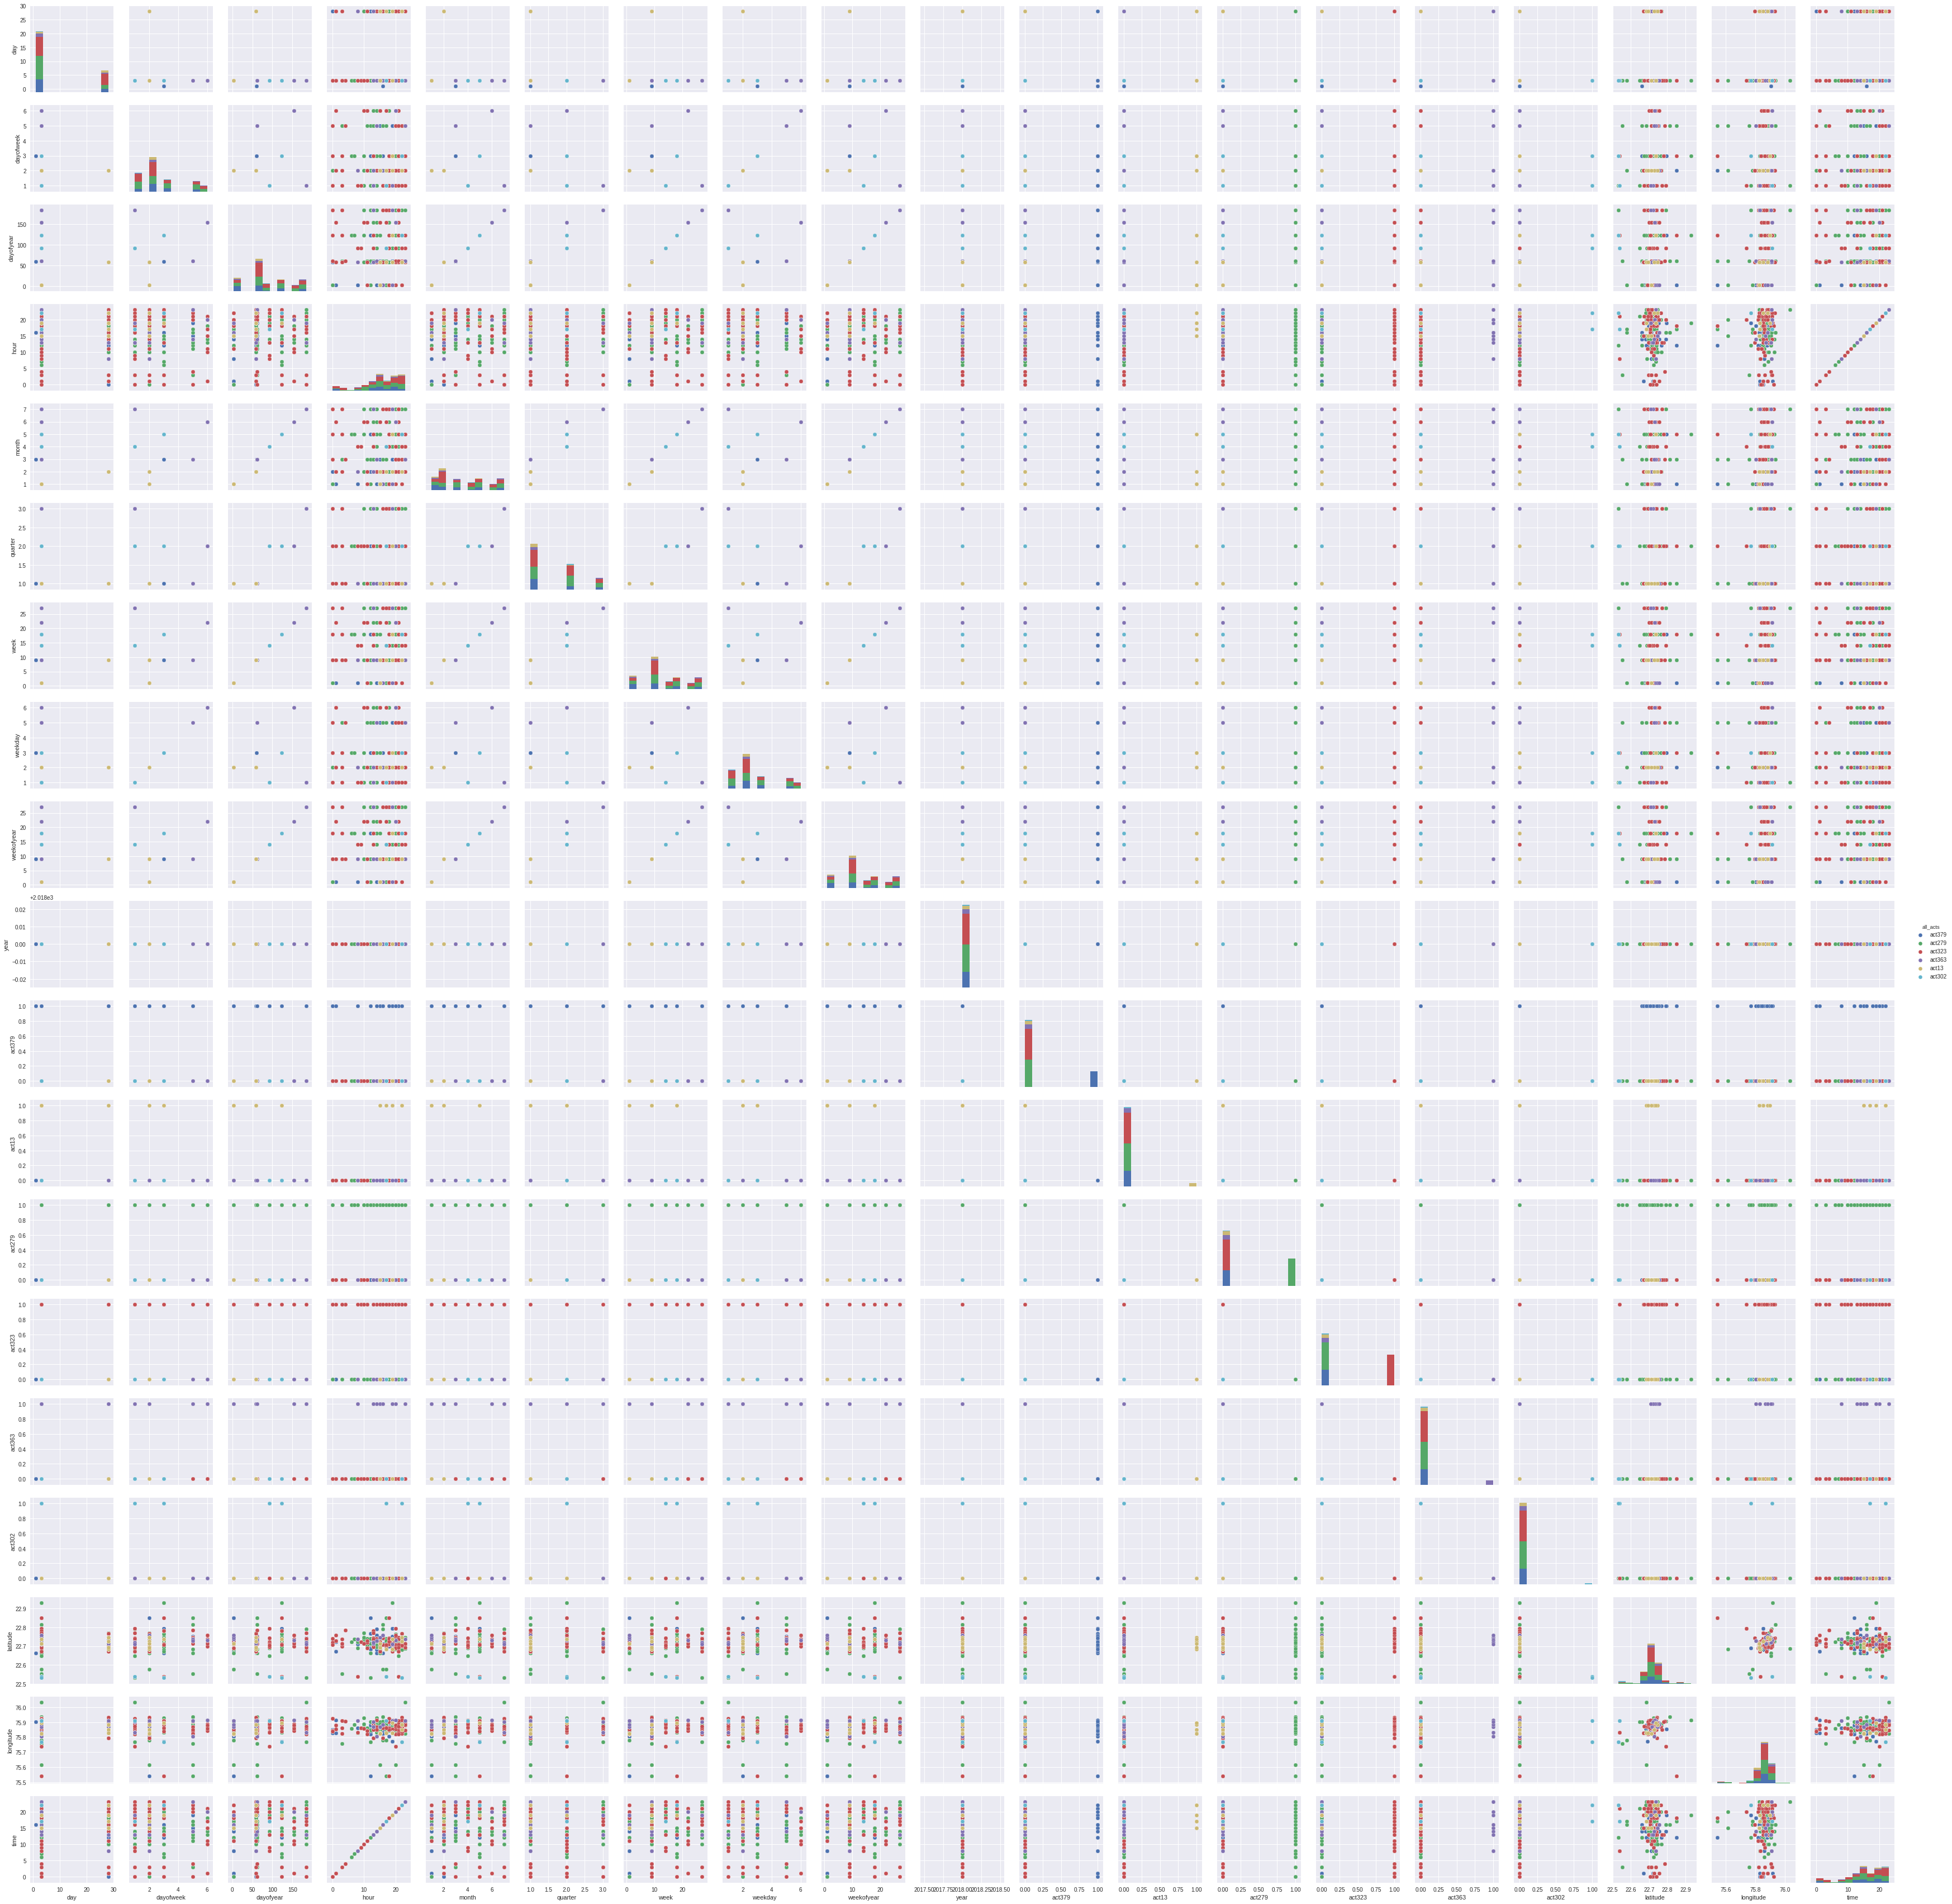

In [0]:
sns.pairplot(data1,hue="all_acts")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


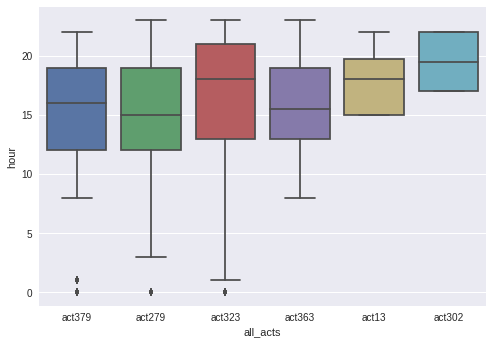

In [0]:
sns.boxplot(data=data1,x='all_acts',y='hour')

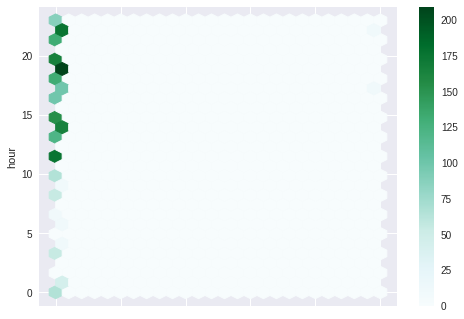

In [0]:
data1.plot.hexbin(x='act302',y='hour',gridsize=25)


#Selecting Features

In [0]:
X0= data1[['dayofweek','dayofyear','hour','month','week','latitude','longitude']]

In [0]:
X0.head()

,dayofweek,dayofyear,hour,month,week,latitude,longitude
0,2.0,59.0,21.0,2.0,9.0,22.737260,75.875987
1,2.0,59.0,21.0,2.0,9.0,22.720992,75.876083
2,2.0,59.0,10.0,2.0,9.0,22.736676,75.883168
3,2.0,59.0,10.0,2.0,9.0,22.746527,75.887139
4,2.0,59.0,10.0,2.0,9.0,22.769531,75.888772


In [0]:
X=X0.values

In [0]:
X

array([[  2.      ,  59.      ,  21.      , ...,   9.      ,  22.73726 ,
         75.875987],
       [  2.      ,  59.      ,  21.      , ...,   9.      ,  22.720992,
         75.876083],
       [  2.      ,  59.      ,  10.      , ...,   9.      ,  22.736676,
         75.883168],
       ...,
       [  1.      , 184.      ,  12.      , ...,  27.      ,  22.531931,
         75.769126],
       [  1.      , 184.      ,  10.      , ...,  27.      ,  22.719569,
         75.857726],
       [  1.      , 184.      ,  23.      , ...,  27.      ,  22.686437,
         76.032055]])

In [0]:
Y0= data1[['act379','act13','act279','act302','act363','act323']]

In [0]:
Y0.head()

,act379,act13,act279,act302,act363,act323
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [0]:
Y=Y0.values
Y

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0]])

##Spliting Data

In [0]:
!pip install sklearn

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.20,random_state=4)

In [0]:
from sklearn.neighbors import KNeighborsClassifier as KNC

In [0]:
knn = KNC(n_neighbors=10)

In [0]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [0]:
knn.score(X_test,Y_test)

0.9685990338164251

In [0]:
jupyter nbconvert --to FORMAT  notebook.ipynb

SyntaxError: ignored